<center>
<img src="https://raw.githubusercontent.com/FUlyankin/ekenam_grand_research/master/images/cover.png">
</center>


# <center> Иканам гранд рисёрч </center>
## <center>  Часть седьмая: моделирование </center>


Проект **Иканам гранд рисёрч** реализуется [Иканам стьюдентс коммьюнити,](https://vk.com/ikanam)
в частности [вот этим парнем по имени Филипп.](https://vk.com/ppilif)  Если вы нашли ошибку или у вас есть предложения, замечания, деньги, слава или женщины, можно ему написать. Весь говнокод, использованный в исследовании распостраняется по лицензии [Creative Commons CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/) Его можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу рисёрча.](https://github.com/FUlyankin/ekenam_grand_research) 


In [13]:
import warnings     # Игнорирование варнингов
warnings.filterwarnings("ignore")  

In [3]:
import numpy as np     # Нумпай для векторов 
import pandas as pd    # Пандас для табличек 
# Округлять в табличках значения до второго знака
pd.set_option('precision', 2)           

# Пакеты для графииков
import matplotlib
import matplotlib.pyplot as plt                             
import seaborn as sns
plt.style.use('ggplot')   # Правильный стиль графиков   

# Пакет для красивых циклов. При желании его можно отключить. Тогда из всех циклов придётся 
# удалять команду tqdm_notebook.
from tqdm import tqdm_notebook   # подробнее: https://github.com/tqdm/tqdm

In [4]:
%matplotlib inline  

# 1. Две задачи и одна наука 

Анализ данных — это довольно обширная область знания. Она включает в себя классический матстат, эконометрику, машинное обучение и многие другие более специфические вещи. Анализ данных занимается тем, что ищет ответ на [два великих вопроса:](https://www.coursera.org/learn/ekonometrika/lecture/S7E9y/1-1-1-sut-mietoda-naimien-shikh-kvadratov) 

* Как устроен мир? Как переменная $y$ зависит от переменной $x$? 
* Что будет завтра? Как спрогнозировать переменную $y$? 

Обычно для поиска ответов на эти два вопроса используются модели. Эти модели оцениваются с помощью собранных данных. На работу каждой модели накладываются какие-то ограничения. Оценивая коэффициенты в моделях, мы хотим, чтобы они обладали тремя свойствами: 

1. **Несмещенность** — чем больше у нас наблюдений, тем ближе среднее значение наших оценок к истиному значению параметра;
2. **Состоятельность** — чем больше данных, тем почти наверное ближе наши оценки к истине;
3. **Эффективность** — разброс нашей оценки минимален в некотором классе оценок, если данные меняются, наша оценка меняется менее сильно, нежели другие.

В зависимости от того на какой из двух вопросов мы ищем ответ, мы можем приносить некоторые ограничения в жертву. Переформулируем великие вопросы в контексте нашей проблемы и немного подумаем о жертвах, которые мы собираемя принести анализу данных.

## 1.1 Великий вопрос номер один

Интерпретация. Пусть мы хотим знать какие именно переменные увеличивают наши шансы закончить эконом и насколько сильно. 
В нашем распоряжении оказался довольно большой массив данных. От баллов за ЕГЭ до подписок и информации из профилей. Предположим, что мы оценили модель только по баллам ЕГЭ и по наличию олимпиады. Коэффицент перед переменной, отвечающей за наличие олимпиады получился довольно большим. Он равен $42$. 

Означает ли это, что при наличии олимпиады, мои шансы закончить эконом возрастают пропорционально этому коэффициенту?  Заметьте, я не говорю, что вероятность закончить эконом увеличивается на 42 процентных пункта, потому что мы оцениваем логистическую регрессию. В такой модели интерпретация коэффициентов устроена более сложным образом. Значение коэффициента $\hat \beta$ интерпретируется, как величина изменения шансов (смотри 2 том Носко, страницу 205) либо [7 неделю лекций Бориса Борисовича,](https://www.coursera.org/learn/ekonometrika/lecture/JaRpY/7-1-5-loghit-modiel-doska) а лучше и то и то.

Так вот, означат ли это, что мои шансы закончить эконом растут пропорционально 42? Нет, не означает. Почему? Потому что вероятность закончить первый курс, в равной степени как и способность написать олимпиаду или хорошо сдать ЕГЭ, зависят от такой ненаблюдаемой переменной, как уровень умственных способностей. Эта переменная, в нашей ситуации оказалась в ошибке. В конечном счёте, из-за её пропуска возникает корреляция регрессора и ошибки, оценки коэффициентов оказываются смещёнными и несостоятельными, а сама по себе эта ситуация, называется **эндогенностью.** В этом месте я хотел бы передать привет третьему курсу, который, по большей части, не мог сформулировать мне на зачёте по эконометрике, определение эндогенности. 

Так вот, из-за эндогенности, оценки коэффициентов оказываются **смещенными** и **несостоятельными**. Они ни в коей мере не отражают реальность. В связи с этим мы ничерта не можем сказать о влиянии олимпиады на шансы закончить эконом. Для того, чтобы сделать это, нужно добавить в модель какие-то **инструментальные переменные**, которые будут нести в себе информацию об уровне умственных способностей человека. 

В нашем случае, за создание таких переменных отвечает социальная сеть. Мы наблюдаем за тем, на какие паблики подписывается человек, что он пишет у себя в профиле и так далее. Это позволяет собрать какую-то информацию о его складе ума, характере и других, одному процессу порождения данных ведомых, скрытых от нас характеристиках. В конечном счёте, когда мы добавим в модель эти переменные, мы вынесем ненаблюдаемый эффект из ошибки, корреляция между ошибкой и регрессором исчезнет и оценки в модели получатся состоятельными. 

Предположим, что оценка коэффициента после всех этих манипуляций, оказалась равна $5$. Если никаких других источников эндогенности не осталось,и, при этом, объём данных был довольно большим, мы, дейтвительно можем сказать, что наличие олимпиды увеличивает шансы человека закончить эконом пропроционально 5. Конечно же, при условии, если коэффициент оказывается значим. 

Мы боролись за интерпретацию коэффициента перед переменной, отвечающей за олимпиаду и хотели узнать насколько это важно. Можно сказать, что наша борьба закончилась успешно. 

**Но ведь кроме олимпиады у нас в модели куча других переменных!** Например,  в ней есть переменная, которая отвечает за наличие подписки на мдк. И она равна $-3000$. Означает ли это, что если я прямо сейчас отпишусь от мдк, мои шансы закончить эконом так сильно вырастут? 

Если вы знали об исследовании и отписались из-за этого, **ничего у вас не вырсатет,** потому что изменилась не причина, а следствие.  Если вы не знали об исследовании, в вашей жизни произошло какое-то переосмысление ценностей, вы поняли, что там тупые мемы, а ботать очень круто, то да. Ваши шансы закончить эконом возрастут. Возрастут не потому что вы отписались от мдк, а потому что что-то произошло с причиной того, что вы на него были подписаны. Произошло что-то с ненаблюдаемой переменной, которая несёт информацию о вашем характере.

**Ещё раз, ещё раз,** в первой ситуации, просто-напросто, испортился информационный канал, за который отвечала инструментальная переменная "паблик мдк", во втором случае изменилась истиная информация и наш информационный канал в виде инструментальной переменной сообшил нам про это.  Интерпретировать коэффициенты в логистической регрессии можно так и только так. 

## 1.2  Великий вопрос номер два 

Прогнозы. Пусть мы хотим уметь хорошо прогнозировать отчислят ли человека с эконома или нет. Предположим, что мы оценили регрессию из предыдущего пункта. Она хороша, коэффициенты хороши, всё значимо, на улице светит солнце, все гиптезы проверены, вода в ручьях кристально чистая, эндогенности нет и во всём мире мир. Можно ли использовать её для прогнозирования? **Конечно да.** Ура, расходимся!

**Секундочку. А что если я скажу вам, что ваши прогнозы можно улучшить?** При оценивании логистической регрессии максимизируется логарифм правдоподобия. Этот логарифм можно немного переписать и получить логистическую функцию потерь, которую уже нужно будет минимизировать. Уже к ней можно присобачить дополнительное слагаемое, которое будет отвечать за ограничения, накладываеммые на коэффициенты. Если выбрать перед этим ограничением правильный множатель и проминимизировать всё это добро, то коэффициенты окажутся смещенными, но при этом прогнозы станут лучше. 

Как такое происходит? А очень просто! [Можно показать,](https://habrahabr.ru/company/ods/blog/323890/) что ошибка прогноза складывается из **квадрата смещения**, **дисперсии** и **неустранимой ошибки**

$$
Err = Var(\hat y) + Bias^2(\hat y) + \sigma^2 
$$


Если с последней мы ничего сделать не можем, то на первые два слагаемых мы можем как-то влиять. В идеале, конечно же, хотелось бы свести на нет оба этих слагаемых (левый верхний квадрат рисунка), но на практике часто приходится балансировать между смещенными и нестабильными оценками (высокая дисперсия).

<img align="center" src="https://hsto.org/files/aa5/d0f/149/aa5d0f149838470fb997ca405c4c55a0.png" width="350">




Как правило, при увеличении сложности модели (например, при увеличении количества свободных параметров) увеличивается дисперсия (разброс) оценки, но уменьшается смещение. Из-за того что тренировочный набор данных полностью запоминается вместо обобщения, небольшие изменения приводят к неожиданным результатам (переобучение). Если же модель слабая, то она не состоянии выучить закономерность, в результате выучивается что-то другое, смещенное относительно правильного решения.

Наша святая всех святых, **Теорема Гаусса-Маркова** как раз утверждает, что МНК-оценка параметров линейной модели является самой лучшей в классе несмещенных линейных оценок, то есть с наименьшей дисперсией. Вопрос в предпосылках теоремы Гаусса-Маркова. Они практически никогда не выполнены. Это позволяет регуляризатором уменьшить разброс за счёт смещения и улучшить прогнозы. 

Однако, в этом случае, мы приносим в жертву интерпретацию. Оценки коэффициентов оказываются смещёнными и не отражают никаких реалий. Единственное, на что в такой ситуации можно обращать внимание, это знак коэффициента и его размер. Чем больше абсолютное значение коэффициента, тем более важна эта переменная. Но какой именно вклад она вносит, мы не знаем. 

Более подробно, со всеми формулами и выводами, об этом (и не только об этом) можно почитать в двух отлично сделанных статьях на хабре. 

1. [Про переобучение, комплексные собственные значения, регуляризаторы и байесовскую интерпретацию линейных моделей](https://habrahabr.ru/company/ods/blog/322076/)
2. [Про линейные модели и логит.](https://habrahabr.ru/company/ods/blog/323890/) На мой взгляд, написано на стыке эконометрики и машинного обучения. 

Более того, модели можно усложнять. В большей части ситуаций, такое усложнение, делает модель неинтерпретируемой.

## 1.3 О том, где находится тонкая грань

Итак, есть два великих вопроса. **А ещё есть совершенно дебильная грань между людьми, которые пытаются найти ответы на них.** Не просто дебильная грань, а условная дебильная грань. Каждый раз, когда я на неё наталкиваюсь, меня это удивляет и поражает. 

Область, которая занимается поиском интерпретации, чаще всего называют эконометрикой. Она сконцентрирована на смысле оценок. Она пытается понять за какой рычаг надо дернуть, чтобы целевая переменная изменилась ровно настолько, насколько нам нужно. Эти благородные цели вынуждают эконометриста проверять гипотезы и строить доверительные интервалы, чтобы быть уверенным. Не преведи процесс порождения данных, если что-то пойдёт не так. Прошу заметить, что это не означет, что эконометрика не уделяет прогнозам никакого внимания. Она уделяет им огромное внимание (вспомним хотябы то, как изучаются временные ряды). Но при этом это внимание уделяется через призму интерпретации. Чаще всего специалистами по эконометрике становятся экономисты. Главная отличительная особенность эконометристов в том, что они относятся к данным как к чему-то очень хрупкому. Они бояться их исказить. Эконометрика является более академичной. Она довольно стара.  

Область, которая концентрируется на прогнозах, чаще всего называют машинным обучением. Эта область использует ровно те же самые концепции, что и эконометрика, но немного иначе. Концентрация на прогнозах обогащает арсенал статитсики всякими приблудами вроде нейронок и деревьев. Интерпретируемости моделей уделяется второстепенная роль. На неё смотрят сквозь призму прогнозирования. Чаще всего специалистами по машинному обучению становятся прогеры. Главная отличительная особенность таких людей в том, что они смотрят на машинное обучение как на набор алгоритмов и относятся к данным как к расходному материалу. Машинка моложе эконометрики. 

В итоге, на почве этих различий рождаются [вот такие статьи.](http://www.machinelearning.ru/wiki/images/8/85/Breiman01stat-ml.pdf) и [записи в блогах по ним.](http://econometricsense.blogspot.ru/2011/01/classical-statistics-vs-machine.html) Вот как так получается, чёрт возьми! Я экономист. Сначала я выучил эконометрику, затем машинку. Я очень удивился тому, что на эконометрике никто не обмолвился ни одним словом про кросс-валидацию и регуляризацию. Как можно вообще изучать временные ряды, где одной из целей является именно прогнозирование, без кросс-валидации? Ещё больше я удивляюсь, когда пацаны с ВМК занимаются машинкой и не знают что такое гетероскедастичность или инструментальная переменная. В этом же блоге есть вот такая замечательная картинка. 

<img align="center" src="http://3.bp.blogspot.com/_0Lnn2oP30gU/TTWr0XRM1MI/AAAAAAAAAKk/pqA6JSThqsA/s320/data+science+Venn-724969.jpeg" width="350">


Вы закончили ВМК? Умеете прогать и можете в матан? Вы машинлёрнер! Вы закончили эконом и можете в здравый смысл и всякие разные эконом-конецепции, а ещё вы можете в матан, потому что вы закончили нормальный эконом? Вы традиционый рисёрчер-эконометрист! Ну не херня ли? Боже мой, а когда речь заходит о сраче между python, основным инструментов машинлёрнеров и R, основным инструментов эконометристов, то тут хоть стой хоть падай. Оба языка прекрасны! Внешне они похожи, поэтому их легко осваивать. При этом они сделаны под разные задачи. Например, я никогда не буду заниматься временными рядами в python, точно также как я не буду никогда заниматься нейросетями в R. 

УХ! Вместо кратенького введния в моделирование получился целый толмуд философии. Не ожидал я от себя такого. Друзья! Я призываю вас ещё разок посмотреть на диаграмму выше. Не надо быть традиционным рисёрчером-эконометристом. Не надо быть машинлёрнером. Обе этих дороги одни сплошные ограничения. Смотрите на всё это добро как на одну огромную цельную область. Бутстрапьте доверительные интервалы для деревьев, кросс-валидируйте вары и векмы. Будьте дата-сайнтистами. Это окроет перед вами огромные приемущества.   

# 2. Наша первая модель (логистическая регрессия)

Сконцентрируемся на прогнозах. Будем использовать линейные модели с регуляризаторами.

## 2.1 Данные по приказам

Для начала В ходе предобработки данных, мы сохранили несколько разных датафрэймов. Подгрузим самый первый. Разобьём его на две части. На **тренировочной выборке,** `X_tr`, мы будем обучать модели. На **тестовой выборке,** `X_val`, мы будем проверять качество модели. На тест оставим 2016 год.

In [76]:
# подгрузили
data1 = pd.read_csv('data_1_easy.csv',sep='\t',index_col=0)

# выбросили хлам 
data1_X = data1[data1.year != 2017].drop(['uids','firstname','lastname','prohodnoy', # 'hodit_para','hodit_tusa',
        'target_1','target_2','target_3','target_4','kurs','zima','leto','akadem'],axis=1)

# Нулями залились только недостающие куски в колонке с целевиками
X_tr = data1_X[data1_X.year != 2016].drop('year',axis=1).fillna(0).get_values( )
X_val = data1_X[data1_X.year == 2016].drop('year',axis=1).fillna(0).get_values( )

# Выделили таргеты в отдельную переменную
y_tr = data1[data1.year < 2016]['target_1'].get_values()
y_val = data1[data1.year == 2016]['target_1'].get_values()

variable_names = data1_X.drop('year',axis=1).columns.get_values()

print('Всего:', data1_X.shape)
print('Трэйн:', X_tr.shape, y_tr.shape)
print('Тест:', X_val.shape, y_val.shape)

print('\n Метки:', '\n', y_tr[:10], '\n')
print('Переменные: \n', X_tr)

data1_X.head()

Всего: (379, 11)
Трэйн: (308, 10) (308,)
Тест: (71, 10) (71,)

 Метки: 
 [ 1.  1.  1.  0.  1.  1.  1.  0.  1.  0.] 

Переменные: 
 [[ 203.            0.            0.         ...,    3.33333333  -44.            0.        ]
 [ 255.            0.            0.         ...,    3.33333333    8.            0.        ]
 [ 249.            0.            0.         ...,    3.33333333    2.            0.        ]
 ..., 
 [ 217.            0.            0.         ...,    5.          -36.            1.        ]
 [ 217.            0.            0.         ...,    3.33333333  -36.            1.        ]
 [ 211.            0.            0.         ...,    3.33333333  -42.            1.        ]]


,year,EGE,lgota,chelevoe,olimp,dogovor,ochko-zaochka,hodit_para,hodit_tusa,ege_diff,kozko
0,2012,203.0,0,0.0,1,0,0,2.67,3.33,-44.0,0
1,2012,255.0,0,0.0,1,0,0,3.67,3.33,8.0,0
2,2012,249.0,0,0.0,1,0,0,3.67,3.33,2.0,0
3,2012,242.0,1,0.0,0,0,0,3.33,1.67,-5.0,0
4,2012,203.0,1,0.0,0,0,0,3.67,1.67,-44.0,0


Первую модель будем строить на основе данных из приказов. Построим константное предсказание. 

In [77]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

n_tr = y_tr.shape[0]
n_val = y_val.shape[0]

print('Трэйн:')
print('accuracy_0 :', accuracy_score(y_tr, [0]*n_tr))
print('accuracy_1 :', accuracy_score(y_tr, [1]*n_tr))
print('roc-auc:', roc_auc_score(y_tr, np.ones(y_tr.shape)))

print( '\n', 'Тест:')
print('accuracy_0 :', accuracy_score(y_val, [0]*n_val))
print('accuracy_1 :', accuracy_score(y_val, [1]*n_val))
print ('roc-auc:', roc_auc_score(y_val, np.ones(y_val.shape)))

Трэйн:
accuracy_0 : 0.324675324675
accuracy_1 : 0.675324675325
roc-auc: 0.5

 Тест:
accuracy_0 : 0.295774647887
accuracy_1 : 0.704225352113
roc-auc: 0.5


Напомню, что из предварительного анализа данных, было ясно, что $2/3$ людей заканчиваю эконом. Соответственно, если мы спрогнозируем для каждого человека, что он закончит эконом, точность у такой модели окажется на уровне $70%$. Любая модель, которая покажет точность ниже сразу же может быть отправлена на свалку. 

**написать про рок аук** отсылка к ББ

Попробуем обучить нашу первую логистическую регрессию без всего и посмотрим что она нам выдаст. 

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Train accuracy 0.782467532468
Validation accuracy 0.802816901408 

Train roc-auc 0.854759615385
Validation roc-auc 0.864285714286


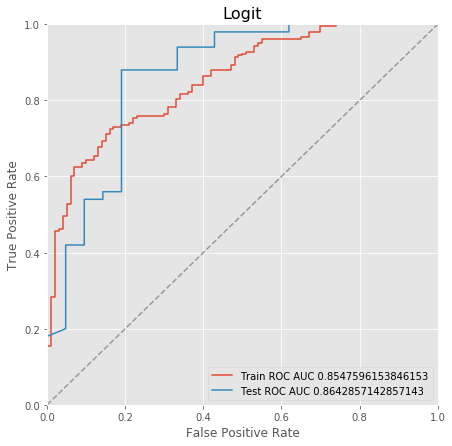

In [79]:
# Функция для вывода метрик качества
def printer(y_tr, y_val, model):
    y_hat_tr = model.predict_proba(X_tr)[:,1]
    y_hat_val = model.predict_proba(X_val)[:,1]
    print ('Train accuracy', accuracy_score(y_tr, model.predict(X_tr)))
    print ('Validation accuracy', accuracy_score(y_val, model.predict(X_val)), '\n')
    print ('Train roc-auc', roc_auc_score(y_tr, y_hat_tr))
    print ('Validation roc-auc', roc_auc_score(y_val, y_hat_val))
    
# Функция для отрисовки roc-auc кривой    
def roc_auc_pic(y_tr,y_val,model):
    y_hat_tr = model.predict_proba(X_tr)[:,1]
    y_hat_val = model.predict_proba(X_val)[:,1]
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_tr, y_hat_tr)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_val, y_hat_val)
    roc_auc_train = roc_auc_score(y_tr, y_hat_tr)
    roc_auc_test = roc_auc_score(y_val, y_hat_val)

    matplotlib.rcParams['figure.figsize'] = (7, 7)
    plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logit', size=16)
    plt.legend(loc='lower right')
    plt.show()
    
printer(y_tr, y_val, lr)
roc_auc_pic(y_tr,y_val, lr)

In [80]:
# Качество модели на кросс-валидации 
from sklearn.cross_validation import cross_val_score
scoring = cross_val_score(lr, X_tr, y_tr, scoring = 'accuracy', cv =5)
print(scoring.mean())
scoring

0.753093601269


array([ 0.70967742,  0.82258065,  0.77419355,  0.73770492,  0.72131148])

In [81]:
for a,b in zip(data1_X.columns.get_values(), lr.coef_[0]):
    print(a,b)

year -0.0137302221302
EGE 0.42454650784
lgota -0.231390167366
chelevoe 0.631667366923
olimp -0.417665697723
dogovor 0.459763954895
ochko-zaochka 0.981341714722
hodit_para 0.442521146727
hodit_tusa 0.0189182909729
ege_diff -0.230847398393


Качество модели около $60%$. Хуже константного. Можно смело отправлять модель на помойку. 

{'C': 0.040201005123115578}


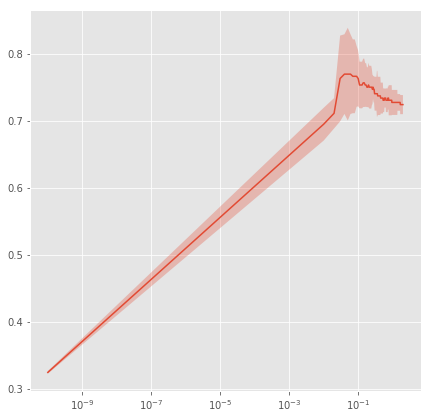

In [82]:
from sklearn.grid_search import GridSearchCV

parameters_grid = {
    # 'penalty' : ['l1', 'l2'],
    'C' : np.linspace(0.0000000001, 2, num = 200)
}

gridsearch = GridSearchCV(LogisticRegression(penalty = 'l1'), parameters_grid, scoring = 'accuracy', cv = 3)
gridsearch.fit(X_tr, y_tr)

def plot_scores(optimizer):
    print( optimizer.best_params_)
    scores = [[item[0]['C'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()

plot_scores(gridsearch)

In [83]:
printer(y_tr, y_val, gridsearch.best_estimator_)

Train accuracy 0.772727272727
Validation accuracy 0.830985915493 

Train roc-auc 0.838125
Validation roc-auc 0.849047619048


In [84]:
for a,b in zip(variable_names, gridsearch.best_estimator_.coef_[0]):
    print(a,b)

EGE -0.00601790549887
lgota 0.0
chelevoe 0.0
olimp 0.0
dogovor 0.0
ochko-zaochka 0.0
hodit_para 0.611383157562
hodit_tusa 0.138135906391
ege_diff 0.0172151994095
kozko 0.0


In [85]:
scoring = cross_val_score(LogisticRegression(penalty='l1', C = 0.04), X_tr, y_tr, scoring = 'accuracy', cv =5)
print(scoring.mean())

0.762665256478


Если добавить в модель переменные `hodit_tusa` и `hodit_para`, качество подскакивает до $75\%$.

## 2. 2  Данные по профилю вк 

In [99]:
# подгрузили
data2 = pd.read_csv('prof_data.csv',sep='\t')

data2_X = data2[data2.year != 2017].drop(['uids','uid','firstname','lastname','prohodnoy', 
                                        'hodit_para','hodit_tusa',
        'target_1','target_2','target_3','target_4','kurs','zima','leto','akadem'],axis=1)

data2_X.drop(['EGE','lgota','chelevoe','olimp','dogovor','ochko-zaochka','ege_diff','kozko'],axis=1,inplace=True)
data2_X.drop(['profile_first_name','profile_last_name'],axis=1,inplace=True)
data2_X.drop([item for item in data2_X.columns.get_values() if item[-3:] == 'cat'],axis=1,inplace=True)

# Нулями залились только недостающие куски в колонке с целевиками
X_tr = data2_X[data2_X.year != 2016].drop('year',axis=1).fillna(0).get_values( )
X_val = data2_X[data2_X.year == 2016].drop('year',axis=1).fillna(0).get_values( )

# Выделили таргеты в отдельную переменную
y_tr = data2[data2.year < 2016]['target_1'].get_values()
y_val = data2[data2.year == 2016]['target_1'].get_values()

variable_names = data2_X.drop('year',axis=1).columns.get_values()

print('Всего:', data2_X.shape)
print('Трэйн:', X_tr.shape, y_tr.shape)
print('Тест:', X_val.shape, y_val.shape)

print('\n Метки:', '\n', y_tr[:10], '\n')
print('Переменные: \n', X_tr)

data2_X.head()

Всего: (379, 39)
Трэйн: (308, 38) (308,)
Тест: (71, 38) (71,)

 Метки: 
 [ 1.  1.  1.  0.  1.  1.  1.  0.  1.  0.] 

Переменные: 
 [[   1.    0.    1. ...,  157.    0.    0.]
 [   1.    0.    1. ...,    0.    1.    3.]
 [   1.    0.    1. ...,  258.    0.    0.]
 ..., 
 [   1.    0.    1. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    1.    0. ...,    6.    0.    0.]]


,year,profile_city_moscow_dummy,profile_city_none_dummy,profile_country_russia_dummy,profile_country_none_dummy,profile_folowers_cnt,profile_male_dummy,profile_has_ava_dummy,profile_wall_comments_dummy,profile_facebook_dummy,...,profile_pages_cnt,profile_vuz_ranepa_yes_dummy,profile_vuz_none_dummy,profile_gifts_cnt,profile_moscow_hometown_dummy,profile_econom_yes_dummy,profile_relation_partner_yes_dummy,profile_group_hide_dummy,profile_engl_dummy,profile_lang_cnt
0,2012,1.0,0.0,1.0,0.0,141.0,1.0,1.0,1.0,0.0,...,100.0,1.0,0.0,0.0,0.0,0.0,0.0,157.0,0.0,0.0
1,2012,1.0,0.0,1.0,0.0,173.0,0.0,1.0,1.0,0.0,...,76.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
2,2012,1.0,0.0,1.0,0.0,136.0,0.0,1.0,1.0,0.0,...,102.0,0.0,0.0,27.0,0.0,0.0,1.0,258.0,0.0,0.0
3,2012,0.0,1.0,1.0,0.0,119.0,0.0,1.0,0.0,0.0,...,16.0,0.0,1.0,37.0,0.0,0.0,0.0,35.0,0.0,0.0
4,2012,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train accuracy 0.883116883117
Validation accuracy 0.845070422535 

Train roc-auc 0.938389423077
Validation roc-auc 0.872380952381


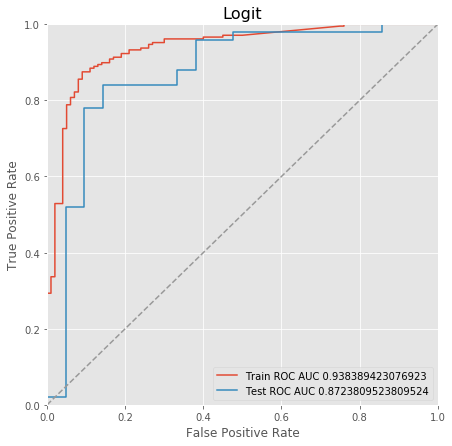

Качество на валидации: 0.840824960338


In [100]:
lr = LogisticRegression()
lr.fit(X_tr, y_tr)

printer(y_tr, y_val, lr)
roc_auc_pic(y_tr,y_val, lr)

scoring = cross_val_score(lr, X_tr, y_tr, scoring = 'accuracy', cv =5)
print('Качество на валидации:', scoring.mean())

{'C': 0.2110552764713568}


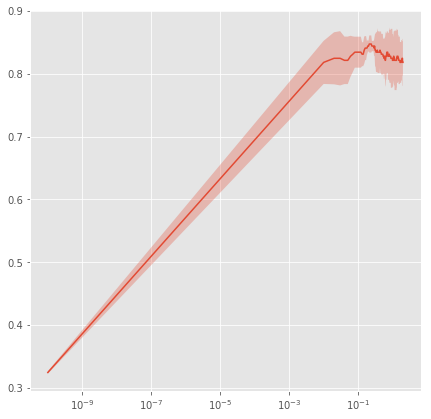

In [101]:
gridsearch = GridSearchCV(LogisticRegression(penalty = 'l1'), parameters_grid, scoring = 'accuracy', cv = 3)
gridsearch.fit(X_tr, y_tr)

plot_scores(gridsearch)

In [102]:
for a,b in zip(variable_names, gridsearch.best_estimator_.coef_[0]):
    print(a,b)

profile_city_moscow_dummy 0.0
profile_city_none_dummy 0.0
profile_country_russia_dummy 0.0
profile_country_none_dummy 0.0
profile_folowers_cnt -0.00124893958968
profile_male_dummy 0.0
profile_has_ava_dummy 0.0
profile_wall_comments_dummy 0.0
profile_facebook_dummy 0.0
profile_instagram_dummy 0.0
profile_skype_dummy 0.0
profile_twitter_dummy 0.0
profile_home_phone_dummy 0.0
profile_mobile_phone_dummy 0.0
profile_site_dummy 0.0
meprofile_can_post_dummy 0.0
meprofile_can_see_all_posts_dummy 0.0
meprofile_can_see_audio_dummy 0.0
meprofile_can_write_private_message_dummy 0.0
profile_albums_cnt 0.306613565868
profile_audio_cnt -0.000246510627489
profile_followers_cnt -0.000831337718617
profile_friends_cnt -0.00239668261152
profile_mutual_friends_cnt 0.100184769611
profile_notes_cnt 0.0393226791682
profile_photos_cnt 0.0310530149331
profile_subscriptions_cnt -0.0963279112994
profile_videos_cnt 0.000220753416777
profile_pages_cnt -0.00529269205084
profile_vuz_ranepa_yes_dummy 0.0
profile_vuz_n

In [109]:
sum(gridsearch.best_estimator_.coef_[0] != 0)

15

Train accuracy 0.873376623377
Validation accuracy 0.816901408451 

Train roc-auc 0.913052884615
Validation roc-auc 0.890476190476


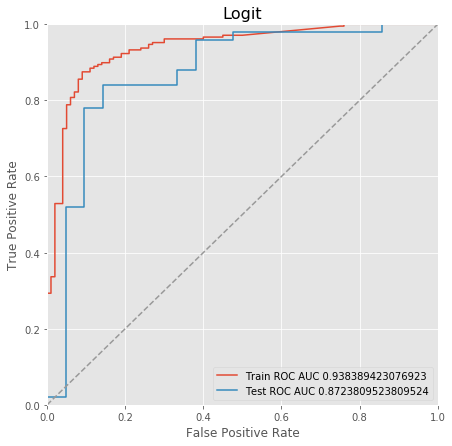

In [103]:
printer(y_tr, y_val, gridsearch.best_estimator_)
roc_auc_pic(y_tr,y_val, lr)

In [104]:
scoring = cross_val_score(LogisticRegression(penalty='l1', C = 0.23), X_tr, y_tr, scoring = 'accuracy', cv =5)
print(scoring.mean())

0.84103648863


Train accuracy 0.980519480519
Validation accuracy 0.830985915493 

Train roc-auc 0.989927884615
Validation roc-auc 0.759047619048


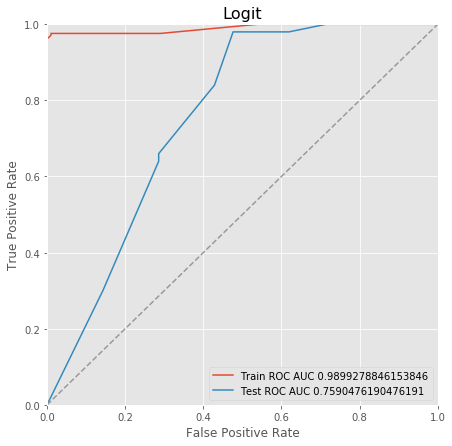

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,max_features='sqrt')
rf.fit(X_tr, y_tr)

printer(y_tr, y_val, rf)
roc_auc_pic(y_tr,y_val, rf)

In [106]:
scoring = cross_val_score(rf, X_tr, y_tr, scoring = 'accuracy', cv =5)
print(scoring.mean())
scoring

0.850713907985


array([ 0.80645161,  0.88709677,  0.83870968,  0.85245902,  0.86885246])

# 3. Только фотки 



In [ ]:
df_ph = pd.read_csv('../1.Download_vk_data/vk_photo_data_v18-12-17.csv', sep = '\t', index_col=0)
df_ph.drop(['photo_text'], axis=1, inplace= True )

data3 = pd.read_csv('data_1_easy.csv',sep='\t',index_col=0)

data3_X = data1[data3.year != 2017].drop(['firstname','lastname','year','prohodnoy', 'hodit_para','hodit_tusa',
        'target_1','target_2','target_3','target_4','kurs','zima','leto','akadem'],axis=1)

data3_X = pd.merge(df_ph, data3_X, right_on='uids', left_on='uid',how='right')
data3_X.drop(['uid','uids'],axis=1,inplace=True)

data3_X.drop(['EGE','lgota','chelevoe','olimp','dogovor','ochko-zaochka','ege_diff','kozko'],axis=1,inplace=True)


print(data3_X.shape)

data1_X.head()

In [ ]:
# Нулями залились только недостающие куски в колонке с целевиками
X = data3_X.fillna(0).get_values( )

y = data1[data1.year != 2017]['target_1'].get_values()
print('Метки:', '\n', y[:10], '\n')
print('Переменные: \n', X)

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
print('\n', 'Размеры трэйна и теста:', X_tr.shape, X_val.shape)

In [ ]:
lr = LogisticRegression()
lr.fit(X_tr, y_tr)

printer(y_tr, y_val, lr)
roc_auc_pic(y_tr,y_val, lr)

In [ ]:
gridsearch = GridSearchCV(LogisticRegression(penalty = 'l1'), parameters_grid, scoring = 'log_loss', cv = 3)
gridsearch.fit(X_tr, y_tr)
plot_scores(gridsearch)

printer(y_tr, y_val, gridsearch.best_estimator_)
roc_auc_pic(y_tr,y_val, lr)

In [ ]:
for a,b in zip(data3_X.columns.get_values(), lr.coef_[0]):
    print(a,b)

<img align="center" src="http://img0.reactor.cc/pics/post/ванга-мемгенератор-59018.jpeg" width="300">
